> Обнаружение фальшивых новостей

Точность теста : 94.95268138801262 %


Отчет : 

              precision    recall  f1-score   support

        FAKE       0.94      0.95      0.95       304
        REAL       0.96      0.95      0.95       330

    accuracy                           0.95       634
   macro avg       0.95      0.95      0.95       634
weighted avg       0.95      0.95      0.95       634



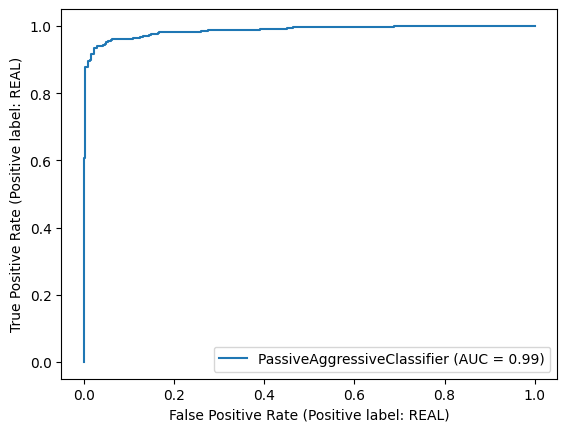

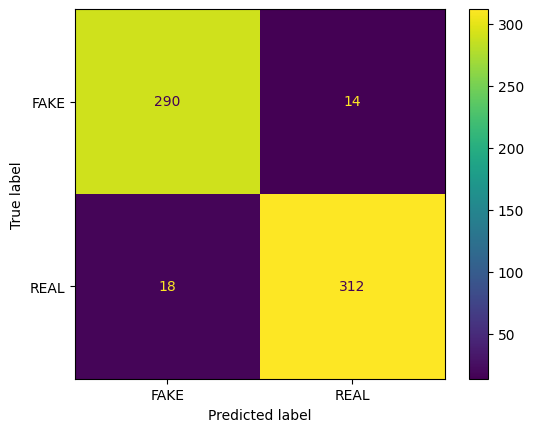

In [ ]:
# @title Пассивно-агрессивный классификатор
import warnings
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt


warnings.filterwarnings('ignore')

# Открываю файл
df = pd.read_csv(f'fake_news.csv')

# Удаляю столбец
df = df.drop('Unnamed: 0', axis=1)

def creatvec(df):
    title = df['title'].to_list()
    text = df['text'].to_list()
    label = df['label'].to_list()
    # Соединяю заголовок и текст, убираю ненужные переносы строк
    for i in range(len(title)):
        temp = title[i] + '. ' + text[i]
        title[i] = temp.replace('\n', '')

    return title, label

# Получаю признаки
X, y = creatvec(df)

# Создаю вектор
vectorizer = TfidfVectorizer()
# Загружаю в вектор
X = vectorizer.fit_transform(X)

# Разбиваю выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 10)


# Создаю модель
model = PassiveAggressiveClassifier(C = 0.5, random_state = 5)
# Обучаю
model.fit(X_train, y_train)

# Рисую
RocCurveDisplay.from_estimator(model, X_test, y_test)

# Прогрнозирую
test_pred = model.predict(X_test)

# Матрица ошибок
cm = confusion_matrix(y_test, test_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()



print(f"Точность теста : {metrics.accuracy_score(y_test, test_pred) * 100} %\n\n")

print(f"Отчет : \n\n{metrics.classification_report(y_test, test_pred)}")

> Обнаружение болезни паркинсона с помощью XGBoost

	Результаты обучающего множества
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00       116

    accuracy                           1.00       156
   macro avg       1.00      1.00      1.00       156
weighted avg       1.00      1.00      1.00       156

Точность теста : 89.74358974358975 %



	Результаты трениовочного множества
              precision    recall  f1-score   support

           0       0.70      0.88      0.78         8
           1       0.97      0.90      0.93        31

    accuracy                           0.90        39
   macro avg       0.83      0.89      0.86        39
weighted avg       0.91      0.90      0.90        39



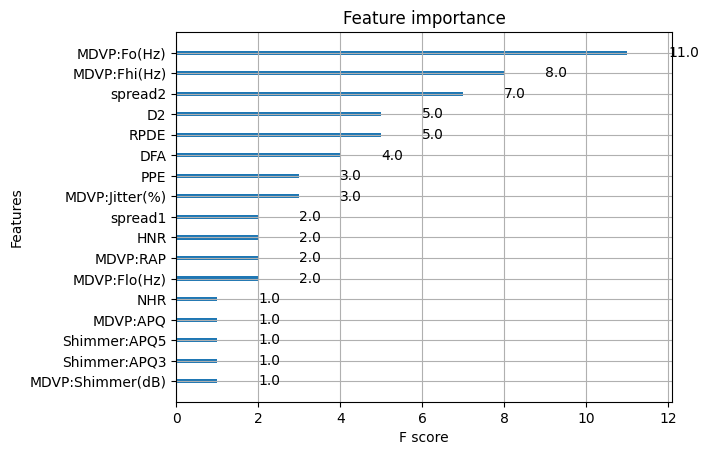

In [ ]:
import warnings
import pandas as pd
import xgboost as xgb
import matplotlib
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report

warnings.filterwarnings('ignore')


# Открываю файл
df = pd.read_csv(f'parkinsons.data')

# Убираю строку с именем
df = df.drop('name',axis=1)

# Рандом строк
df = df.sample(frac=1)

# Две выборки, тренировка 80%, а тест 20%
x_train, x_test, y_train, y_test = df[:int(80*df.shape[0]/100)].drop('status', axis=1), df[int(80*df.shape[0]/100):].drop('status', axis=1), df['status'][:int(80*df.shape[0]/100)], df['status'][int(80*df.shape[0]/100):]

# Создаю модель
model = xgb.XGBClassifier(seed=9, n_estimators=200, max_depth=9, learning_rate=1)

# Обучаю модель
model.fit(x_train, y_train)

# Сравниваю тренировку
y_pred_train = model.predict(x_train)
print('\tРезультаты обучающего множества')
print(classification_report(y_train,y_pred_train))

# Сравниваю тест
y_pred_test = model.predict(x_test)
print(f"Точность теста : {accuracy_score(y_test, y_pred_test) * 100} %\n\n")
print('\n\tРезультаты трениовочного множества')
print(classification_report(y_test,y_pred_test))

xgb.plot_importance(model)
plt.show()

> Распознавание дорожных знаков

In [ ]:
!unzip 'drive/MyDrive/archive.zip' -d 'dataset'

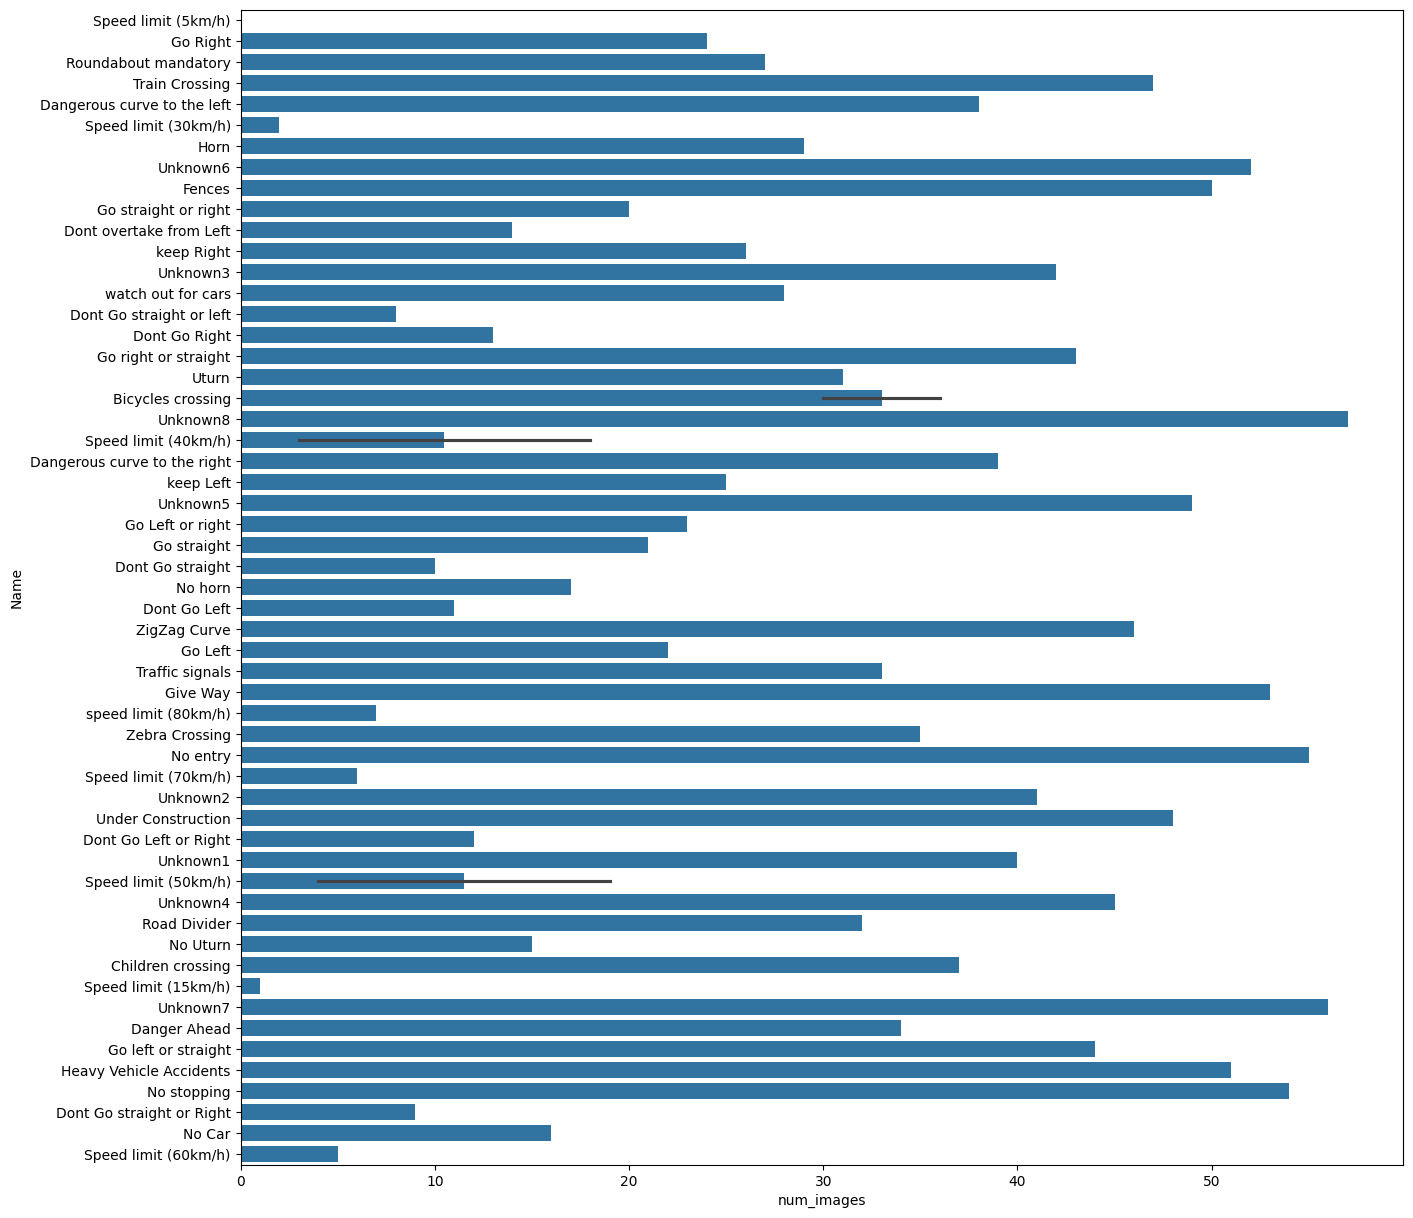

In [ ]:
import seaborn as sns
df = pd.read_csv('dataset/labels.csv')
dataset = 'dataset/traffic_Data/DATA'

data = []
entry = []
for filename in os.listdir(dataset):
  entry.append(df['Name'][int(filename)])
  entry.append(int(filename))
  data.append(entry[:2])
  entry.clear()

display_data = pd.DataFrame(data,columns=['Name' , 'num_images'])
plt.figure(figsize=(15,15))
ax = sns.barplot(x='num_images',y='Name' , data=display_data)

Epoch 1/50
131/131 [==============================] - 44s 27ms/step - loss: 3.0463 - accuracy: 0.2041 - val_loss: 2.7132 - val_accuracy: 0.2387
Epoch 2/50
131/131 [==============================] - 2s 18ms/step - loss: 1.8100 - accuracy: 0.4743 - val_loss: 2.0461 - val_accuracy: 0.4042
Epoch 3/50
131/131 [==============================] - 2s 18ms/step - loss: 1.1035 - accuracy: 0.6624 - val_loss: 1.7563 - val_accuracy: 0.4845
Epoch 4/50
131/131 [==============================] - 2s 18ms/step - loss: 0.7702 - accuracy: 0.7542 - val_loss: 1.4398 - val_accuracy: 0.5607
Epoch 5/50
131/131 [==============================] - 2s 18ms/step - loss: 0.5741 - accuracy: 0.8254 - val_loss: 1.5254 - val_accuracy: 0.5978
Epoch 6/50
131/131 [==============================] - 2s 17ms/step - loss: 0.4319 - accuracy: 0.8681 - val_loss: 1.4838 - val_accuracy: 0.6158
Epoch 7/50
131/131 [==============================] - 2s 18ms/step - loss: 0.3453 - accuracy: 0.8906 - val_loss: 1.4652 - val_accuracy: 0.625

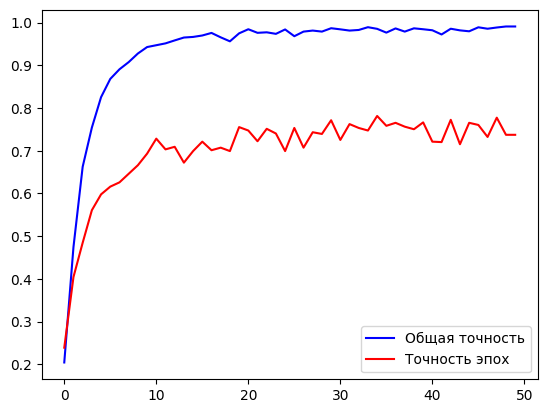

In [ ]:
# https://www.kaggle.com/datasets/ahemateja19bec1025/traffic-sign-dataset-classification/data

import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
# from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

# Получаю признаки и данные для проверки обучающей выборки
def get_datas():
  # Создаю пути
  global_path = 'dataset/traffic_Data'
  path_direct_data = os.path.join(global_path, 'DATA')
  path_direct_test = os.path.join(global_path, 'TEST')


  # Инициализирую признаки и данные проверки
  img_train, label_train, img_test, label_test = [], [], [], []

  # Открываю файл
  df = pd.read_csv('dataset/labels.csv')
  directories = df['ClassId'].to_list()

  # Заполняю обучающую выборку
  for fold in directories:
    for img in os.listdir(os.path.join(path_direct_data, str(fold))):
      img_train.append(os.path.join(path_direct_data, str(fold), img))
      label_train.append(int(fold))

  # Заполняю тестовую выборку
  for img in os.listdir(os.path.join(path_direct_test)):
    img_test.append(os.path.join(path_direct_test, img))
    label_test.append(int(img.split('_')[0]))

  return img_train, np.array(label_train), img_test, np.array(label_test)

img_train, label_train, img_test, label_test = get_datas()

# Признаки перевожу в нормальный вид для обучения
def conver_to_pixels():
  x_train, x_test = [], []

  # Преобразую картинку в пиксели
  for img in img_train:
    # Открываю картинку
    image = load_img(img, target_size=(100,100))
    # Преобразую в пиксели
    image = img_to_array(image)
    # Массив картинок в пикселях
    x_train.append(image)


  for img in img_test:
    # Открываю картинку
    image = load_img(img, target_size=(100,100))
    # Преобразую в пиксели
    image = img_to_array(image)
    # Массив картинок в пикселях
    x_test.append(image)


  return np.array(x_train) / 255, np.array(x_test) / 255

x_train, x_test = conver_to_pixels()
y_train, y_test = label_train.flatten(), label_test.flatten()

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128 ,(3, 3), activation='tanh'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64 , activation = 'relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(128 , activation = 'relu'))
model.add(layers.Dense(58))


# Компилируем модель
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

hist = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test,  y_test)

plt.plot(hist.history['accuracy'], label='Общая точность', color='blue')
plt.plot(hist.history['val_accuracy'], label='Точность эпох', color='red')
plt.legend()

print(f'Функция потерь: {test_loss}')
print(f'Точность: {test_acc}')